## Project 1 — Microbial Abundance Analyzer Pro
Goal

Load a microbiome abundance dataset (CSV format) containing microbial taxa and their measured counts across multiple samples.
Compute total and mean abundance for each taxon, classify taxa as high or low abundance using a ternary operator, apply vectorized calculations with NumPy, summarize results through list comprehensions and descriptive statistics, and export the cleaned, annotated data for visualization and further analysis.

What the code does

• Loads a CSV file (Micro_Data.csv) containing microbial taxa (in the Taxonomy column) and abundance values for different samples (A- and B-series columns).

• Cleans and extracts numerical data for computational analysis using Pandas.

• Computes total and mean abundance for each taxon with vectorized NumPy operations.

• Classifies each taxon as High Abundance or Low Abundance using a ternary conditional expression based on the dataset’s median mean-abundance value.

• Generates summary statistics such as mean and median total abundance for the overall dataset.

• Exports a processed file (abundance_report.csv) containing taxonomy names, calculated abundance values, and classification results.

• Visualizes the top 20 microbial taxa ranked by mean abundance using a Matplotlib bar plot, providing a clear graphical representation of the dominant species in the sample set.

Mean Total Abundance: 907.51
Median Total Abundance: 11.00

Category counts:
 Abundance_Category
High_Abundance    2914
Low_Abundance     2705
Name: count, dtype: int64
✅ Saved as abundance_report.csv


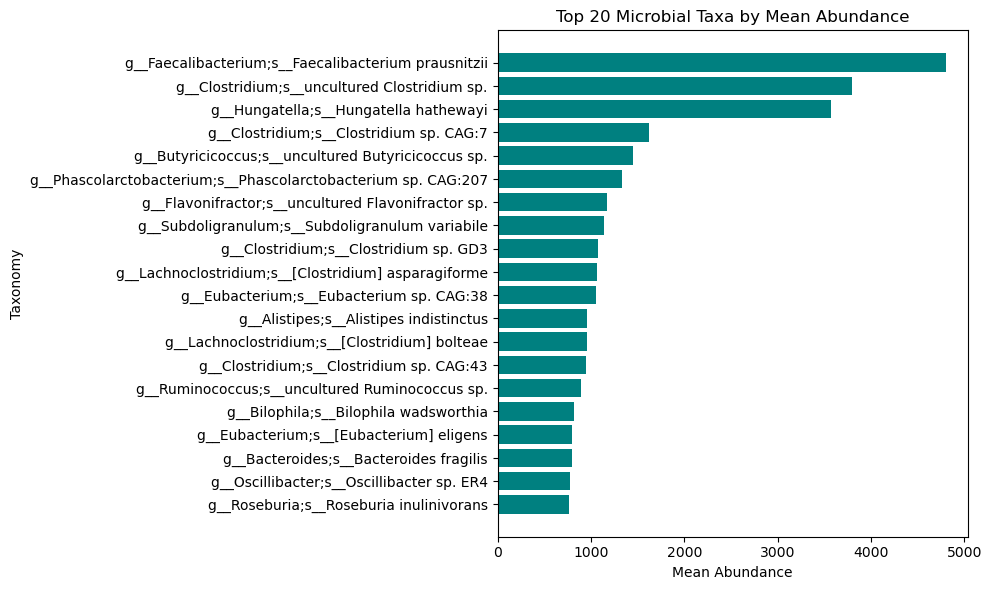

In [11]:
# 🦠 Microbial Abundance Analyzer Pro
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Load dataset ---
df = pd.read_csv("Micro_Data.csv")

# --- Extract abundance values ---
abundance_df = df.drop(columns=["Taxonomy"])
df["Total_Abundance"] = abundance_df.sum(axis=1)
df["Mean_Abundance"] = abundance_df.mean(axis=1)

# --- Ternary operator: classify high or low abundance ---
threshold = df["Mean_Abundance"].median()
df["Abundance_Category"] = ["High_Abundance" if x >= threshold else "Low_Abundance"
                            for x in df["Mean_Abundance"]]

# --- Summary statistics ---
mean_total = df["Total_Abundance"].mean()
median_total = df["Total_Abundance"].median()

print(f"Mean Total Abundance: {mean_total:.2f}")
print(f"Median Total Abundance: {median_total:.2f}")
print("\nCategory counts:\n", df["Abundance_Category"].value_counts())

# --- Save output ---
df.to_csv("abundance_report.csv", index=False)
print("✅ Saved as abundance_report.csv")

# --- Visualization: Top 20 taxa by mean abundance ---
top20 = df.nlargest(20, "Mean_Abundance")

plt.figure(figsize=(10, 6))
plt.barh(top20["Taxonomy"], top20["Mean_Abundance"], color="teal")
plt.gca().invert_yaxis()
plt.title("Top 20 Microbial Taxa by Mean Abundance")
plt.xlabel("Mean Abundance")
plt.ylabel("Taxonomy")
plt.tight_layout()
plt.show()
